<a href="https://colab.research.google.com/github/fedemoss/HelmholtzCage/blob/main/Variaciones_angulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El objetivo de este código es estudiar como varia la homogeneidad para jaulas cuadradas y circulares al variar la alineación (con un desfasaje angular) en alguno de los ejes de la jaula**


In [ ]:
import math
import numpy as np
from scipy.integrate import quad
from numpy import sqrt, sin, cos, pi
from matplotlib import pyplot as plt

In [ ]:
## Constantes:
## Todo está en SI:

N = 40  ## número de vueltas
I = 1   ## corriente
u0 = 1.256637062* 10 ** (-6)  ## permeabilidad del vacio
C = u0 * N * I / (4 * np.pi)  

**DEFINICIÓN DE LOS CAMPOS PARA DOS BOBINAS CIRCULARES ENFRENTADAS**

In [ ]:
## Término que aparece en común para todos los campos

def terminoDivisorup(u, z, x, y, r, d):
    return ((z + d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2)
  
def terminoDivisordown(u, z, x, y, r, d):
    return ((z - d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2) 

## Campo en la dirección axial para las dos bobinas en cartesianas (Bz)

def dBzup(u, z, x, y, r, d):
    return C * r * (r - x * cos(u) - y * sin(u)) / terminoDivisorup(u, z, x, y, r, d)

def dBzdown(u, z, x, y, r, d):
    return C * r * (r - x * cos(u) - y * sin(u)) / terminoDivisordown(u, z, x, y, r, d) 

## Componente x del campo (par de bobinas)

def dBxup(u, z, x, y, r, d):
    return C * r  * (z + d/2) * cos(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBxdown(u, z, x, y, r, d):
    return C * r * (z - d/2) * cos(u)/terminoDivisordown(u, z, x, y, r, d)

## Componente y del campo (par de bobinas)

def dByup(u, z, x, y, r, d):
    return C * r * (z + d/2) * sin(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBydown(u, z, x, y, r, d):
    return C * r * (z - d / 2) * sin(u)/terminoDivisordown(u, z, x, y, r, d)  

**DEFINICIÓN DE LOS CAMPOS PARA DOS BOBINAS CUADRADAS ENFRENTADAS**

In [ ]:
## Campo en el eje axial en cartesianas (Bz)
## La expresión es muy grande por lo tanto la separamos en varias partes
## bobinas a d/2 y -d/2 en el eje z con respecto al centro

def SBz1up(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2up(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3up(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z + d / 2) ** 2)     ## ojo acá
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4up(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es la función que importa (campo en z)

def SBzup(z, x, y, l, d):
    return SBz1up(z, x, y, l, d) - SBz2up(z, x, y, l, d) + SBz3up(z, x, y, l, d) - SBz4up(z, x, y, l, d)

## Campo en el eje axial para la otra bobina

def SBz1down(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2down(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3down(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4down(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es la otra función que importa (campo en z)

def SBzdown(z, x, y, l, d):
    return SBz1down(z, x, y, l, d) - SBz2down(z, x, y, l, d) + SBz3down(z, x, y, l, d) - SBz4down(z, x, y, l, d)

## Campo en la componente x para la primer bobina

def SBx1up(z, x, y, l, d):
    factorcomun = (z + d/2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBx2up(z, x, y, l, d):
    factorcomun = (z + d/2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

# La función que importa (campo en x)

def SBxup(z, x, y, l, d):
    return SBx1up(z, x, y, l, d) - SBx2up(z, x, y, l, d)

# Campo en el eje x para la otra bobina

def SBx1down(z, x, y, l, d):
    factorcomun = (z - d/2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBx2down(z, x, y, l, d):
    factorcomun = (z - d/2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

# La función que importa (campo en x)

def SBxdown(z, x, y, l, d):
    return SBx1down(z, x, y, l, d) - SBx2down(z, x, y, l, d)


## Campo en la componente y para la primer bobina

def SBy1up(z, x, y, l, d):
    factorcomun = (z + d/2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBy2up(z, x, y, l, d):
    factorcomun = (z + d/2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y + l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

# la función que importa (campo en y)

def SByup(z, x, y, l, d):
    return SBy1up(z, x, y, l, d) - SBy2up(z, x, y, l, d)

# Campo en el eye y para la segunda bobina

def SBy1down(z, x, y, l, d):
    factorcomun = (z - d/2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBy2down(z, x, y, l, d):
    factorcomun = (z - d/2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y + l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

# La función que importa (campo en y)

def SBydown(z, x, y, l, d):
    return SBy1down(z, x, y, l, d) - SBy2down(z, x, y, l, d)

**DEFINICIÓN DE LA TRANSFORMACIÓN DE LAS COORDENADAS Y LOS CAMPOS**

In [ ]:
## definición de los campos ángulares:
## rotación en z. Bz no transforma (sólo cambian las coordenadas)

def xrotz(tita, x , y):
  return cos(tita) * x + sin(tita) * y

def yrotz(tita, x, y):
  return cos(tita) * y - sin(tita) * x

def Bxrotz(tita, Bx, By):
  return cos(tita) * Bx - sin(tita) * By

def Byrotz(tita, Bx, By):
  return cos(tita) * By + sin(tita) * Bx

# rotación en x. Bx no cambia (sólo cambian las coordenadas)

def yrotx(phi, y, z):
  return cos(phi) * y + sin(phi) * z

def zrotx(phi, y, z):
  return cos(phi) * z - sin(phi) * y

def Bzrotx(phi, By, Bz):
  return cos(phi) * Bz + sin(phi) * By

def Byrotx(phi, By, Bz):
  return cos(phi) * By - sin(phi) * Bz

## rotación en y. By no cambia, (sólo cambian las coordenadas)

def xroty(beta, x, z):
  return cos(beta) * x - sin(beta) * z

def zroty(beta, x, z):
  return cos(beta) * z + sin(beta) * x

def Bzroty(beta, Bx, Bz):
  return cos(beta) * Bz - sin(beta) * Bx

def Bxroty(beta, Bx, Bz):
  return cos(beta) * Bx + sin(beta) * Bz

**ROTACIÓN EN X PARA LA BOBINA CIRCULAR (4 BORDES)**

In [ ]:
## Para realizar la rotación realizamos un loop para cadad ángulo
## vamos a considerar cuatro bordes, que en coordenadas (x, y)
## se encuentran en: (5cm, 5cm), (-5cm, -5cm), (-5cm, 5cm) y (5cm, -5cm). En todos esos puntos
## variamos en z (desde -5cm a 5cm) y calculamos el campo con su correcta transformación ángular
## para cada ángulo calculamos la homogeneidad 

r = 0.5  # radio de la bobina
d = r    # distancia ideal
phi = np.linspace(0, np.pi/16, 50) #  intervalo de variación del ángulo de inclinación
x = 0.05  # borde del CubeSat (5cm)
y = 0.05  # borde del CubeSat
z = np.linspace(-0.05, 0.05, 111)  # variamos a z desde -5cm a 5cm para así calcular el campo en esos puntos, y tomar el máximo de homogeneidad

# Array donde guardamos los campos para las distintas iteraciones

Bzcircle = np.zeros(len(z))  # Componente z del campo por la variación en z
Bycircle = np.zeros(len(z))  # Componente y del campo por la variación en z
Bxcircle = np.zeros(len(z))  # Componente x del campo por la variación en z

## Los siguientes array dependen de los bordes posicionados en distintas puntos (x, y)
## En esoss array se guarda la homogeneidad en función ángulo.
## La razón de elegir varios bordes es que los bordes son afectados de forma distinta según la rotación

HomogeneidadC1rotx = np.zeros(len(phi))  # Homogeneidad para el borde (5cm, 5cm)
HomogeneidadC2rotx = np.zeros(len(phi))  # Homogeneidad para el borde (-5cm, -5cm)
HomogeneidadC3rotx = np.zeros(len(phi))  # Homogeneidad para el borde (-5cm, 5cm)
HomogeneidadC4rotx = np.zeros(len(phi))  # Homogeneidad para el borde (5cm, -5cm)

## rotación en x, primer borde (5cm, 5cm). Por cada ángulo calculamos el campo (transformado)
## y obtenemos la homogeneidad (que se guarda en su correspondiente array)
## Transformamos a una sola bobina (la otra queda fija)

for h in range(len(phi)):
  # Calculo del campo al variar z
  for i in range(len(z)):
    # transformación de las coordenadas
    zrot = zrotx(phi[h], y, z[i])
    yrot = yrotx(phi[h], y, z[i])
    # integral numérica con la transformación de una de las bobinas (usamos la transformación en x)
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(zrot, x, yrot, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(zrot, x, yrot, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(zrot, x, yrot, r, d))
    # Calculo del campo, con una de las componentes transformadas dada una rotación en x
    Bzcircle[i] = (Lz[0] + Bzrotx(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bycircle[i] = (Ly[0] + Byrotx(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Lx[2]) * 10 ** 6
  # integral numérica para el punto (0, 0, 0)
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  # Cálculo del campo en el centro, el campo si transforma (pero las coordenadas no porque son 0)
  Bz0 = (Lz0[0] + Bzrotx(phi[h], Ly0[2], Lz0[2])) * 10 ** 6
  By0 = (Ly0[0] + Byrotx(phi[h], Ly0[2], Lz0[0])) * 10 ** 6
  Bx0 = (Lx0[0] + Lx0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  # Cálculo de la homogeneidad para un dado ángulo (está dado por el máximo de la homogeneidad)
  HomogeneidadC1rotx[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## rotación en x, segundo borde (-x, -y). Lo mismo que antes nomas que ponemos - en los lugares correspondientes

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zrotx(phi[h], -y, z[i])
    yrot = yrotx(phi[h], -y, z[i])
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(zrot, -x, yrot, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(zrot, -x, yrot, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(zrot, -x, yrot, r, d))

    Bzcircle[i] = (Lz[0] + Bzrotx(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bycircle[i] = (Ly[0] + Byrotx(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Lx[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0 = (Lz0[0] + Bzrotx(phi[h], Ly0[2], Lz0[2])) * 10 ** 6
  By0 = (Ly0[0] + Byrotx(phi[h], Ly0[2], Lz0[0])) * 10 ** 6
  Bx0 = (Lx0[0] + Lx0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC2rotx[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## Rotacion en x borde 3 (-x, y). Igual que antes poniendo - en los lugares de x

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zrotx(phi[h], y, z[i])
    yrot = yrotx(phi[h], y, z[i])
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(zrot, -x, yrot, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(zrot, -x, yrot, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(zrot, -x, yrot, r, d))

    Bzcircle[i] = (Lz[0] + Bzrotx(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bycircle[i] = (Ly[0] + Byrotx(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Lx[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0 = (Lz0[0] + Bzrotx(phi[h], Ly0[2], Lz0[2])) * 10 ** 6
  By0 = (Ly0[0] + Byrotx(phi[h], Ly0[2], Lz0[0])) * 10 ** 6
  Bx0 = (Lx0[0] + Lx0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC3rotx[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## Rotación en x borde 4 (x, -y). Lo mismo que antes poniendo menos en los lugares de y

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zrotx(phi[h], -y, z[i])
    yrot = yrotx(phi[h], -y, z[i])
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(zrot, x, yrot, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(zrot, x, yrot, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(zrot, x, yrot, r, d))

    Bzcircle[i] = (Lz[0] + Bzrotx(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bycircle[i] = (Ly[0] + Byrotx(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Lx[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0 = (Lz0[0] + Bzrotx(phi[h], Ly0[2], Lz0[2])) * 10 ** 6
  By0 = (Ly0[0] + Byrotx(phi[h], Ly0[2], Lz0[0])) * 10 ** 6
  Bx0 = (Lx0[0] + Lx0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC4rotx[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

# reedefinimos a la variable angular para que quede en grados

phiengrados = 180 * phi/np.pi

**ROTACIÓN EN X PARA LA BOBINA CUADRADA (4 BORDES)**

In [ ]:
## Este código es igual al anterior, con la diferencia que no hay que realizar la integral numérica

l = 1  # largo de la bobina 
d = 0.5445 * l  # distancia ideal
phi = np.linspace(0, np.pi/16, 50)  # intervalo de variación del ángulo de inclinación
x = 0.05  # borde del CubeSat
y = 0.05  # borde del CubeSat
z = np.linspace(-0.05, 0.05, 111)  # variamos a z desde -5cm a 5cm para así calcular el campo en esos puntos, y tomar el máximo de homogeneidad

# Array donde guardamos los campos de las distintas iteraciones 

Bzsquare = np.zeros(len(z))
Bysquare = np.zeros(len(z))
Bxsquare = np.zeros(len(z))

# Usamos la misma definición de bordes que antes

HomogeneidadS1rotx = np.zeros(len(phi)) 
HomogeneidadS2rotx = np.zeros(len(phi)) 
HomogeneidadS3rotx = np.zeros(len(phi))
HomogeneidadS4rotx = np.zeros(len(phi))

## rotación en x, primer borde (x, y)

for h in range(len(phi)):
  for i in range(len(z)):
    # cálculo de las coordenads transformadas
    zrot = zrotx(phi[h], y, z[i])
    yrot = yrotx(phi[h], y, z[i])
    # Esta es el campo de la bobina que se inclina (solo transformacion de coordenadas)
    Bzsquaredes = SBzdown(zrot, x, yrot, l, d) 
    Bysquaredes = SBydown(zrot, x, yrot, l, d) 
    Bxsquaredes = SBxdown(zrot, x, yrot, l, d) 
    # Cálculo del campo para las dos bobinas, transformando correctamente a la bobina inclinada
    Bzsquare[i] = SBzup(z[i], x, y, l, d) + Bzrotx(phi[h], Bysquaredes, Bzsquaredes)
    Bysquare[i] = SByup(z[i], x, y, l, d) + Byrotx(phi[h], Bysquaredes, Bzsquaredes)
    Bxsquare[i] = SBxup(z[i], x, y, l, d) + Bxsquaredes 
  
  # Campo en el centro para la bobina que se inclina (solo transformacion de coordenadas)
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  # Cálculo del campo para las dos boboinas en el centro, con la transformación correspondiente
  Bz0 = (SBzup(0, 0, 0, l, d)  + zrotx(phi[h], Bysquaredes, Bzsquaredes)) 
  By0 = (SByup(0, 0, 0, l, d)  + yrotx(phi[h], Bysquaredes, Bzsquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d) + Bxsquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  # La homogeneidad para un dado ángulo (esta dado por el máximo de homogeneidad)
  HomogeneidadS1rotx[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

## rotacion en x, segundo borde (-x, -y). Lo mismo que antes

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zrotx(phi[h], -y, z[i])
    yrot = yrotx(phi[h], -y, z[i])
    Bzsquaredes = SBzdown(zrot, -x, yrot, l, d) 
    Bysquaredes = SBydown(zrot, -x, yrot, l, d) 
    Bxsquaredes = SBxdown(zrot, -x, yrot, l, d) 
    Bzsquare[i] = (SBzup(z[i], -x, -y, l, d) + Bzrotx(phi[h], Bysquaredes, Bzsquaredes))
    Bysquare[i] = (SByup(z[i], -x, -y, l, d) + Byrotx(phi[h], Bysquaredes, Bzsquaredes))
    Bxsquare[i] = (SBxup(z[i], -x, -y, l, d) + Bxsquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  Bz0 = (SBzup(0, 0, 0, l, d)  + zrotx(phi[h], Bysquaredes, Bzsquaredes)) 
  By0 = (SByup(0, 0, 0, l, d)  + yrotx(phi[h], Bysquaredes, Bzsquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d) + Bxsquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS2rotx[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

## rotación en x tercer borde (-x, y)

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zrotx(phi[h], y, z[i])
    yrot = yrotx(phi[h], y, z[i])
    Bzsquaredes = SBzdown(zrot, -x, yrot, l, d) 
    Bysquaredes = SBydown(zrot, -x, yrot, l, d) 
    Bxsquaredes = SBxdown(zrot, -x, yrot, l, d) 
    Bzsquare[i] = (SBzup(z[i], -x, y, l, d) + Bzrotx(phi[h], Bysquaredes, Bzsquaredes))
    Bysquare[i] = (SByup(z[i], -x, y, l, d) + Byrotx(phi[h], Bysquaredes, Bzsquaredes))
    Bxsquare[i] = (SBxup(z[i], -x, y, l, d) + Bxsquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  Bz0 = (SBzup(0, 0, 0, l, d)  + zrotx(phi[h], Bysquaredes, Bzsquaredes)) 
  By0 = (SByup(0, 0, 0, l, d)  + yrotx(phi[h], Bysquaredes, Bzsquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d) + Bxsquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS3rotx[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

## rotación en x cuarto borde (x, -y)

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zrotx(phi[h], -y, z[i])
    yrot = yrotx(phi[h], -y, z[i])
    Bzsquaredes = SBzdown(zrot, x, yrot, l, d) 
    Bysquaredes = SBydown(zrot, x, yrot, l, d) 
    Bxsquaredes = SBxdown(zrot, x, yrot, l, d) 
    Bzsquare[i] = (SBzup(z[i], x, -y, l, d) + Bzrotx(phi[h], Bysquaredes, Bzsquaredes))
    Bysquare[i] = (SByup(z[i], x, -y, l, d) + Byrotx(phi[h], Bysquaredes, Bzsquaredes))
    Bxsquare[i] = (SBxup(z[i], x, -y, l, d) + Bxsquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  Bz0 = (SBzup(0, 0, 0, l, d)  + zrotx(phi[h], Bysquaredes, Bzsquaredes)) 
  By0 = (SByup(0, 0, 0, l, d)  + yrotx(phi[h], Bysquaredes, Bzsquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d) + Bxsquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS1rotx[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

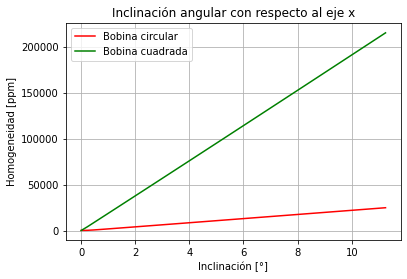

In [ ]:
## gráfico comparativo de rotaciones en x para bobinas circulares y cuadradas
plt.plot(phiengrados, HomogeneidadC1rotx,'red')
plt.plot(phiengrados, HomogeneidadS1rotx,'green')
plt.xlabel('Inclinación [°]')
plt.ylabel('Homogeneidad [ppm]')
plt.legend(['Bobina circular', 'Bobina cuadrada'])
plt.title('Inclinación angular con respecto al eje x')
plt.grid()
plt.show()

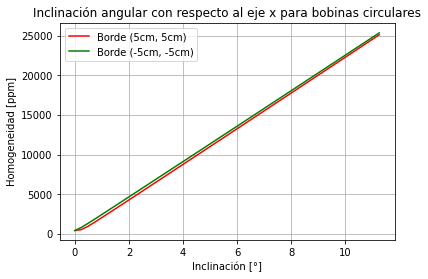

In [ ]:
## gráfico comparativo de rotaciones en x para bobinas circulares, en dos bordes distintos (similar cuadradas)
## Se ve que los bordes se diferencian por muy poco en la homogeneidad, por lo tanto da igual cual elegir
plt.plot(phiengrados, HomogeneidadC1rotx,'red')
plt.plot(phiengrados, HomogeneidadC2rotx,'green')
plt.xlabel('Inclinación [°]')
plt.ylabel('Homogeneidad [ppm]')
plt.legend(['Borde (5cm, 5cm)', 'Borde (-5cm, -5cm)'])
plt.title('Inclinación angular con respecto al eje x para bobinas circulares')
plt.grid()
plt.show()

**ROTACIÓN EN Y CIRCULAR (ES ANÁLOGO A EL DE X)**

In [ ]:
r = 0.5 # radio de la bobina
d = r  # distancia ideal
phi = np.linspace(0, np.pi/16, 50)  # intervalo de variación del ángulo de inclinación
x = 0.05  # borde del CubeSat  (5cm)
y = 0.05  # Borde del CubeSat  (5cm)
z = np.linspace(-0.05, 0.05, 111) # variamos a z desde -5cm a 5cm para así calcular el campo en esos puntos, y tomar el máximo de homogeneidad

# Array de los campos para cada iteración en z

Bzcircle = np.zeros(len(z))
Bycircle = np.zeros(len(z))
Bxcircle = np.zeros(len(z))

# Array de las homogeneidades, definidas igual qeu antes en el punto (x, y) correspondiente

HomogeneidadC1roty = np.zeros(len(phi))  # Borde (5cm, 5cm)
HomogeneidadC2roty = np.zeros(len(phi))  # Borde (-5cm, -5cm)
HomogeneidadC3roty = np.zeros(len(phi))  # Borde (-5cm, 5cm)
HomogeneidadC4roty = np.zeros(len(phi))  # Borde (5cm, -5cm)

## rotación en y, primer borde (x, y). Esto es igual que la inclinación (rotación) en el eje x
## Nada más que se usa la correspondiente transformación para inclinación en y

for h in range(len(phi)):
  for i in range(len(z)):
    # transformación para una rotación en y
    zrot = zroty(phi[h], x, z[i])
    xrot = xroty(phi[h], x, z[i])
    # integral numérica con las correspondientes coordenadas transformadas
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(zrot, xrot, y, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(zrot, xrot, y, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(zrot, xrot, y, r, d))
    # Los campos transformados variando en z
    Bzcircle[i] = (Lz[0] + Bzroty(phi[h], Lx[2], Lz[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Bxroty(phi[h], Lx[2], Lz[2])) * 10 ** 6
    Bycircle[i] = (Ly[0] + Ly[2]) * 10 ** 6
  # Campo en el centro con la correspondiente transformación
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0 = (Lz0[0] + Bzroty(phi[h], Ly0[2], Lz0[2])) * 10 ** 6
  Bx0 = (Lx0[0] + Bxroty(phi[h], Lx0[2], Lz0[0])) * 10 ** 6
  By0 = (Ly0[0] + Ly0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  # Homogeneidad en función del ángulo (se toma el máximo para dada una iteración en z)
  HomogeneidadC1roty[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## rotación en y, segundo borde (-x, -y).

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zroty(phi[h], -x, z[i])
    xrot = xroty(phi[h], -x, z[i])
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(zrot, xrot, -y, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(zrot, xrot, -y, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(zrot, xrot, -y, r, d))

    Bzcircle[i] = (Lz[0] + Bzroty(phi[h], Lx[2], Lz[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Bxroty(phi[h], Lx[2], Lz[2])) * 10 ** 6
    Bycircle[i] = (Ly[0] + Ly[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0 = (Lz0[0] + Bzrotx(phi[h], Ly0[2], Lz0[2])) * 10 ** 6
  Bx0 = (Lx0[0] + Bxroty(phi[h], Lx0[2], Lz0[0])) * 10 ** 6
  By0 = (Ly0[0] + Ly0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC2roty[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## Rotacion en y borde 3 (-x, y)

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zroty(phi[h], -x, z[i])
    xrot = xroty(phi[h], -x, z[i])
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(zrot, xrot, y, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(zrot, xrot, y, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(zrot, xrot, y, r, d))

    Bzcircle[i] = (Lz[0] + Bzroty(phi[h], Ly[2], Lz[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Bxroty(phi[h], Lx[2], Lz[2])) * 10 ** 6
    Bycircle[i] = (Ly[0] + Ly[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0 = (Lz0[0] + Bzroty(phi[h], Lx0[2], Lz0[2])) * 10 ** 6
  Bx0 = (Lx0[0] + Bxroty(phi[h], Lx0[2], Lz0[0])) * 10 ** 6
  By0 = (Ly0[0] + Ly0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC3roty[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## Rotación en x borde 4 (x, -y)

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zroty(phi[h], x, z[i])
    xrot = xroty(phi[h], x, z[i])
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(zrot, xrot, -y, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(zrot, xrot, -y, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(zrot, xrot, -y, r, d))

    Bzcircle[i] = (Lz[0] + Bzroty(phi[h], Lx[2], Lz[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Bxroty(phi[h], Lx[2], Lz[2])) * 10 ** 6
    Bycircle[i] = (Ly[0] + Ly[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0 = (Lz0[0] + Bzroty(phi[h], Lx0[2], Lz0[2])) * 10 ** 6
  Bx0 = (Lx0[0] + Bxroty(phi[h], Lx0[2], Lz0[0])) * 10 ** 6
  By0 = (Ly0[0] + Ly0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC4roty[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

phiengrados = 180 * phi/np.pi

**ROTACIÓN EN Y CUADRADA**

In [ ]:
#Acá es lo mismo que la circular sin integrar numéricamente

l = 1  # largo de la bobina
d = 0.5445 * l  # distancia ideal 
phi = np.linspace(0, np.pi/16, 50) # intervalo de variación de la inclinación angular
x = 0.05  # Borde del CubeSat
y = 0.05  # Borde del CubeSat
z = np.linspace(-0.05, 0.05, 111)  # intervalo de variación de z en -5cm a 5cm

# Array donde guardamos los campos para cada iteración
Bzsquare = np.zeros(len(z))
Bysquare = np.zeros(len(z))
Bxsquare = np.zeros(len(z))

# Array para las homogeneidades con los correspondientes bordes (x, y)
HomogeneidadS1roty = np.zeros(len(phi))  # Borde (5cm, 5cm)
HomogeneidadS2roty = np.zeros(len(phi))  # Borde (-5cm, -5cm)
HomogeneidadS3roty = np.zeros(len(phi))  # Borde (-5cm, 5cm)
HomogeneidadS4roty = np.zeros(len(phi))  # Borde (5cm. -5cm)

## rotación en y, primer borde (x, y). Igual que antes, realizamos la transformación correspondiente
## para las coordenadas y los campos. Iteramo para cada ángulo

for h in range(len(phi)):
  for i in range(len(z)):
    # Transformación de las coordenadas
    zrot = zroty(phi[h], x, z[i])
    xrot = xroty(phi[h], x, z[i])
    # Campo de la bobina inclinada (sólo transformación de las coordenadas)
    Bzsquaredes = SBzdown(zrot, xrot, y, l, d) 
    Bysquaredes = SBydown(zrot, xrot, y, l, d) 
    Bxsquaredes = SBxdown(zrot, xrot, y, l, d) 
    # Campo total con la correspondiente transformación
    Bzsquare[i] = (SBzup(z[i], x, y, l, d) + Bzroty(phi[h], Bxsquaredes, Bzsquaredes))
    Bxsquare[i] = (SBxup(z[i], x, y, l, d) + Bxroty(phi[h], Bxsquaredes, Bzsquaredes))
    Bysquare[i] = (SByup(z[i], x, y, l, d) + Bysquaredes) 
  # Campo en el centro
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  Bz0 = (SBzup(0, 0, 0, l, d)  + zroty(phi[h], Bxsquaredes, Bzsquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d)  + xroty(phi[h], Bxsquaredes, Bzsquaredes)) 
  By0 = (SByup(0, 0, 0, l, d) + Bysquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  # Homogeneidad para un dado ángulo (tomamos el máximo valor de todas las homogeneidades al variar z)
  HomogeneidadS1roty[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

## rotación en y, segundo borde (-x, -y)

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zroty(phi[h], -x, z[i])
    xrot = xroty(phi[h], -x, z[i])
    Bzsquaredes = SBzdown(zrot, xrot, -y, l, d) 
    Bysquaredes = SBydown(zrot, xrot, -y, l, d) 
    Bxsquaredes = SBxdown(zrot, xrot, -y, l, d) 
    Bzsquare[i] = (SBzup(z[i], -x, -y, l, d) + Bzroty(phi[h], Bxsquaredes, Bzsquaredes))
    Bxsquare[i] = (SBxup(z[i], -x, -y, l, d) + Bxroty(phi[h], Bxsquaredes, Bzsquaredes))
    Bysquare[i] = (SByup(z[i], -x, -y, l, d) + Bysquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  Bz0 = (SBzup(0, 0, 0, l, d)  + zroty(phi[h], Bxsquaredes, Bzsquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d)  + xroty(phi[h], Bxsquaredes, Bzsquaredes)) 
  By0 = (SByup(0, 0, 0, l, d) + Bysquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS2roty[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6


## rotación en y borde 3 (-x, y)

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zroty(phi[h], -x, z[i])
    xrot = xroty(phi[h], -x, z[i])
    Bzsquaredes = SBzdown(zrot, xrot, y, l, d) 
    Bysquaredes = SBydown(zrot, xrot, y, l, d) 
    Bxsquaredes = SBxdown(zrot, xrot, y, l, d) 
    Bzsquare[i] = (SBzup(z[i], -x, y, l, d) + Bzroty(phi[h], Bxsquaredes, Bzsquaredes))
    Bxsquare[i] = (SBxup(z[i], -x, y, l, d) + Bxroty(phi[h], Bxsquaredes, Bzsquaredes))
    Bysquare[i] = (SByup(z[i], -x, y, l, d) + Bysquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  Bz0 = (SBzup(0, 0, 0, l, d)  + zroty(phi[h], Bxsquaredes, Bzsquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d)  + xroty(phi[h], Bxsquaredes, Bzsquaredes)) 
  By0 = (SByup(0, 0, 0, l, d) + Bysquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS3roty[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

## rotación 4to borde (x, -y)

for h in range(len(phi)):
  for i in range(len(z)):
    zrot = zroty(phi[h], x, z[i])
    xrot = xroty(phi[h], x, z[i])
    Bzsquaredes = SBzdown(zrot, xrot, -y, l, d) 
    Bysquaredes = SBydown(zrot, xrot, -y, l, d) 
    Bxsquaredes = SBxdown(zrot, xrot, -y, l, d) 
    Bzsquare[i] = (SBzup(z[i], x, -y, l, d) + Bzroty(phi[h], Bxsquaredes, Bzsquaredes))
    Bxsquare[i] = (SBxup(z[i], x, -y, l, d) + Bxroty(phi[h], Bxsquaredes, Bzsquaredes))
    Bysquare[i] = (SByup(z[i], x, -y, l, d) + Bysquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  Bz0 = (SBzup(0, 0, 0, l, d)  + zroty(phi[h], Bxsquaredes, Bzsquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d)  + xroty(phi[h], Bxsquaredes, Bzsquaredes)) 
  By0 = (SByup(0, 0, 0, l, d) + Bysquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS4roty[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

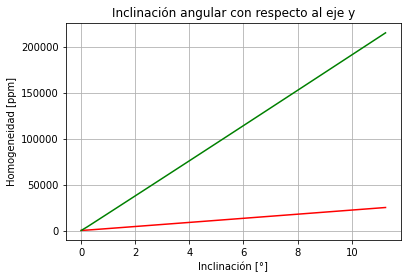

In [ ]:
## gráfico comparativo de rotaciones en y para bobinas circulares y cuadradas
## obtuvimos lo mismo que en la rotación en x
plt.plot(phiengrados, HomogeneidadC1roty,'red')
plt.plot(phiengrados, HomogeneidadS1roty,'green')
plt.xlabel('Inclinación [°]')
plt.ylabel('Homogeneidad [ppm]')
#plt.legend(['Borde (5cm, 5cm)', 'Borde (-5cm, -5cm)'])
plt.title('Inclinación angular con respecto al eje y')
plt.grid()
plt.show()

**ROTACION EN Z CIRCULAR**

In [ ]:
## Rotación en z, el proceso es lo mismo que en x y en y
r = 0.5 # radio de la bobina
d = r  # distancia ideal
phi = np.linspace(0, np.pi/16, 50)  # intervalo de variacion angular
x = 0.05  # borde del CubeSat
y = 0.05  # borde del CubeSat
z = np.linspace(-0.05, 0.05, 111) # intervalo de variación en z

# Array de campos para la variación en z

Bzcircle = np.zeros(len(z))  # Campo en z
Bycircle = np.zeros(len(z))  # Campo en y
Bxcircle = np.zeros(len(z))  # Campo en x

# Array de homogeneidades para la variación angular (distintos bordes)

HomogeneidadC1rotz = np.zeros(len(phi))  # Borde (5cm, 5cm)
HomogeneidadC2rotz = np.zeros(len(phi))  # Borde (-5cm, -5cm)
HomogeneidadC3rotz = np.zeros(len(phi))  # Borde (-5cm, 5cm)
HomogeneidadC4rotz = np.zeros(len(phi))  # Borde (5cm, -5cm)

## rotación en z, borde (x, y). El loop es igual a los anteriores (para la circular)
## nada más que hay que realizar la correspondiente rotación en z

for h in range(len(phi)):
  for i in range(len(z)):
    yrot = yrotz(phi[h], x, y)
    xrot = xrotz(phi[h], x, y)
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))

    Bycircle[i] = (Ly[0] + Byrotz(phi[h], Lx[2], Ly[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Bxrotz(phi[h], Lx[2], Ly[2])) * 10 ** 6
    Bzcircle[i] = (Lz[0] + Lz[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  By0 = (Ly0[0] + Byrotz(phi[h], Lx0[2], Ly0[2])) * 10 ** 6
  Bx0 = (Lx0[0] + Bxrotz(phi[h], Lx0[2], Ly0[0])) * 10 ** 6
  Bz0 = (Lz0[0] + Lz0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC1rotz[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## borde 2 (-x, -y)

for h in range(len(phi)):
  for i in range(len(z)):
    yrot = yrotz(phi[h], -x, -y)
    xrot = xrotz(phi[h], -x, -y)
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], -x, -y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))

    Bycircle[i] = (Ly[0] + Byrotz(phi[h], Lx[2], Ly[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Bxrotz(phi[h], Lx[2], Ly[2])) * 10 ** 6
    Bzcircle[i] = (Lz[0] + Lz[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  By0 = (Ly0[0] + Byrotz(phi[h], Lx0[2], Ly0[2])) * 10 ** 6
  Bx0 = (Lx0[0] + Bxrotz(phi[h], Lx0[2], Ly0[0])) * 10 ** 6
  Bz0 = (Lz0[0] + Lz0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC2rotz[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## borde 3 (-x, y)

for h in range(len(phi)):
  for i in range(len(z)):
    yrot = yrotz(phi[h], -x, y)
    xrot = xrotz(phi[h], -x, y)
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], -x, y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))

    Bycircle[i] = (Ly[0] + Byrotz(phi[h], Lx[2], Ly[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Bxrotz(phi[h], Lx[2], Ly[2])) * 10 ** 6
    Bzcircle[i] = (Lz[0] + Lz[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  By0 = (Ly0[0] + Byrotz(phi[h], Lx0[2], Ly0[2])) * 10 ** 6
  Bx0 = (Lx0[0] + Bxrotz(phi[h], Lx0[2], Ly0[0])) * 10 ** 6
  Bz0 = (Lz0[0] + Lz0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC3rotz[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

## borde 4 (x, -y)

for h in range(len(phi)):
  for i in range(len(z)):
    yrot = yrotz(phi[h], x, -y)
    xrot = xrotz(phi[h], x, -y)
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))
    Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))
    Ly = quad(dByup, 0, 2*np.pi, args=(z[i], x, -y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(z[i], xrot, yrot, r, d))

    Bycircle[i] = (Ly[0] + Byrotz(phi[h], Lx[2], Ly[2])) * 10 ** 6
    Bxcircle[i] = (Lx[0] + Bxrotz(phi[h], Lx[2], Ly[2])) * 10 ** 6
    Bzcircle[i] = (Lz[0] + Lz[2]) * 10 ** 6
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  By0 = (Ly0[0] + Byrotz(phi[h], Lx0[2], Ly0[2])) * 10 ** 6
  Bx0 = (Lx0[0] + Bxrotz(phi[h], Lx0[2], Ly0[0])) * 10 ** 6
  Bz0 = (Lz0[0] + Lz0[2]) * 10 ** 6
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadC4rotz[h] = max(np.sqrt((Bzcircle - Bz0) ** 2 + (Bycircle - By0) ** 2 + (Bxcircle - Bx0) ** 2) / B0) * 10 ** 6

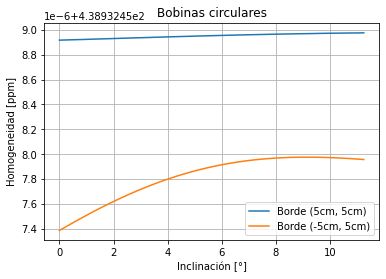

In [ ]:
# gráfico comparativo de rotación en z (circular) para distintos bordes
# Se ve que el eje y es muy chiquito por lo tanto no varia (simetria axial)
# la forma de la curva se debe principalmente a que el codigo trabaja con números chicos 
plt.plot(phiengrados, HomogeneidadC1rotz)
plt.plot(phiengrados, HomogeneidadC3rotz)
#plt.plot(phiengrados, HomogeneidadC3rotz)
#plt.plot(phiengrados, HomogeneidadC4rotz)
plt.xlabel('Inclinación [°]')
plt.ylabel('Homogeneidad [ppm]')
plt.legend(['Borde (5cm, 5cm)', 'Borde (-5cm, 5cm)'])
plt.title('Bobinas circulares')
plt.grid()
plt.show()

**ROTACIÓN EN Z CUADRADA**

In [ ]:
# Lo mismo que antes con la correspondiente transformación de las coordenadas y campos

l = 1  # largo de la bobina
d = 0.5445 * l  # distancia ideal
phi = np.linspace(0, np.pi/16, 50)  # intervalo de variación angular
x = 0.05  # Borde del CubeSat
y = 0.05  # Borde del CubeSat
z = np.linspace(-0.05, 0.05, 111)  # intervalo de variación de z de -5cm a 5cm

# Array de campos para las distintas iteraciones en z

Bzsquare = np.zeros(len(z))  # Campo en z
Bysquare = np.zeros(len(z))  # Campo en y
Bxsquare = np.zeros(len(z))  # Campo en x

# Array de las homogeneidades para las distintas variaciones angulares

HomogeneidadS1rotz = np.zeros(len(phi))  # Borde (5cm, 5cm)
HomogeneidadS2rotz = np.zeros(len(phi))  # Borde (-5cm, -5cm)
HomogeneidadS3rotz = np.zeros(len(phi))  # Borde (-5cm, 5cm)
HomogeneidadS4rotz = np.zeros(len(phi))  # Borde (5cm, -5cm)

## rotación en z, primer borde (x, y). El loop es igual al anterior con la correspondiente
## transformación en z. Obtenemos la homogeneidad para cada ángulo

for h in range(len(phi)):
  for i in range(len(z)):
    # Transformación de las coordenadas
    yrot = yrotz(phi[h], x, y)
    xrot = xrotz(phi[h], x, y)
    # Cálculo de los campo transformados
    Bzsquaredes = SBzdown(z[i], xrot, yrot, l, d) 
    Bysquaredes = SBydown(z[i], xrot, yrot, l, d) 
    Bxsquaredes = SBxdown(z[i], xrot, yrot, l, d) 
    Bzsquare[i] = (SByup(z[i], x, y, l, d) + Byrotz(phi[h], Bxsquaredes, Bysquaredes))
    Bxsquare[i] = (SBxup(z[i], x, y, l, d) + Bxrotz(phi[h], Bxsquaredes, Bysquaredes))
    Bzsquare[i] = (SBzup(z[i], x, y, l, d) + Bzsquaredes) 
  # Campo en el centro transformado
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  By0 = (SByup(0, 0, 0, l, d)  + yrotz(phi[h], Bxsquaredes, Bysquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d)  + xrotz(phi[h], Bxsquaredes, Bysquaredes)) 
  Bz0 = (SBzup(0, 0, 0, l, d) + Bzsquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  # Homogeneidad para el dado ángulo (máximo)
  HomogeneidadS1rotz[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

## rotación en z, segundo borde (-x, -y)

for h in range(len(phi)):
  for i in range(len(z)):
    yrot = yrotz(phi[h], -x, -y)
    xrot = xrotz(phi[h], -x, -y)
    Bzsquaredes = SBzdown(z[i], xrot, yrot, l, d) 
    Bysquaredes = SBydown(z[i], xrot, yrot, l, d) 
    Bxsquaredes = SBxdown(z[i], xrot, yrot, l, d) 
    Bzsquare[i] = (SByup(z[i], -x, -y, l, d) + Byrotz(phi[h], Bxsquaredes, Bysquaredes))
    Bxsquare[i] = (SBxup(z[i], -x, -y, l, d) + Bxrotz(phi[h], Bxsquaredes, Bysquaredes))
    Bzsquare[i] = (SBzup(z[i], -x, -y, l, d) + Bzsquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  By0 = (SByup(0, 0, 0, l, d)  + yrotz(phi[h], Bxsquaredes, Bysquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d)  + xrotz(phi[h], Bxsquaredes, Bysquaredes)) 
  Bz0 = (SBzup(0, 0, 0, l, d) + Bzsquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS2rotz[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

## rotación en z, tercer borde (-x, y)

for h in range(len(phi)):
  for i in range(len(z)):
    yrot = yrotz(phi[h], -x, y)
    xrot = xrotz(phi[h], -x, y)
    Bzsquaredes = SBzdown(z[i], xrot, yrot, l, d) 
    Bysquaredes = SBydown(z[i], xrot, yrot, l, d) 
    Bxsquaredes = SBxdown(z[i], xrot, yrot, l, d) 
    Bzsquare[i] = (SByup(z[i], -x, y, l, d) + Byrotz(phi[h], Bxsquaredes, Bysquaredes))
    Bxsquare[i] = (SBxup(z[i], -x, y, l, d) + Bxrotz(phi[h], Bxsquaredes, Bysquaredes))
    Bzsquare[i] = (SBzup(z[i], -x, y, l, d) + Bzsquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  By0 = (SByup(0, 0, 0, l, d)  + yrotz(phi[h], Bxsquaredes, Bysquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d)  + xrotz(phi[h], Bxsquaredes, Bysquaredes)) 
  Bz0 = (SBzup(0, 0, 0, l, d) + Bzsquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS3rotz[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6


## rotación en z, cuarto borde (x, -y)

for h in range(len(phi)):
  for i in range(len(z)):
    yrot = yrotz(phi[h], x, -y)
    xrot = xrotz(phi[h], x, -y)
    Bzsquaredes = SBzdown(z[i], xrot, yrot, l, d) 
    Bysquaredes = SBydown(z[i], xrot, yrot, l, d) 
    Bxsquaredes = SBxdown(z[i], xrot, yrot, l, d) 
    Bzsquare[i] = (SByup(z[i], x, -y, l, d) + Byrotz(phi[h], Bxsquaredes, Bysquaredes))
    Bxsquare[i] = (SBxup(z[i], x, -y, l, d) + Bxrotz(phi[h], Bxsquaredes, Bysquaredes))
    Bzsquare[i] = (SBzup(z[i], x, -y, l, d) + Bzsquaredes) 
  
  Bzsquaredes = SBzdown(0, 0, 0, l, d) 
  Bysquaredes = SBydown(0, 0, 0, l, d) 
  Bxsquaredes = SBxdown(0, 0, 0, l, d) 
  By0 = (SByup(0, 0, 0, l, d)  + yrotz(phi[h], Bxsquaredes, Bysquaredes)) 
  Bx0 = (SBxup(0, 0, 0, l, d)  + xrotz(phi[h], Bxsquaredes, Bysquaredes)) 
  Bz0 = (SBzup(0, 0, 0, l, d) + Bzsquaredes) 
  B0 = np.sqrt(Bz0 ** 2 + By0 ** 2 + Bx0 ** 2)
  HomogeneidadS4rotz[h] = max(np.sqrt((Bzsquare - Bz0) ** 2 + (Bysquare - By0) ** 2 + (Bxsquare - Bx0) ** 2 ) / B0) * 10 ** 6

phiengrados = 180 * phi / np.pi

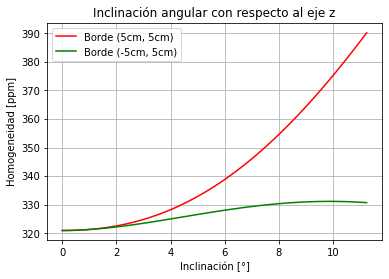

In [ ]:
## gráfico comparativo de rotaciones en z para dos bordes [bobina cuadrada]
## Algo a notar que los bordes (5cm, 5cm) y (-5cm, -5cm) dan las mismas curvas
## mientras que los otros dos que faltan también dan la misma entre si
## Esto se debe a como afecta la rotación a distintos puntos
plt.plot(phiengrados, HomogeneidadS1rotz,'red')
plt.plot(phiengrados, HomogeneidadS3rotz,'green')
plt.xlabel('Inclinación [°]')
plt.ylabel('Homogeneidad [ppm]')
plt.legend(['Borde (5cm, 5cm)', 'Borde (-5cm, 5cm)'])
plt.title('Inclinación angular con respecto al eje z')
plt.grid()
plt.show()